In [8]:
import keras as k
from keras.applications.vgg16 import VGG16
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
def plot_history(hst, title = ''):
    plt.figure(figsize=(13, 4))

    plt.subplot(1, 2, 1)
    plt.plot(hst.history['loss'], label='train')
    plt.plot(hst.history['val_loss'], label='test')
    plt.title('Loss')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot([round(100*e, 2) for e in hst.history['accuracy']], label='train')
    plt.plot([round(100*e, 2) for e in hst.history['val_accuracy']], label='test')
    plt.title('Accuracy')

    plt.ylim(0, 100)
    plt.legend()
    plt.grid()

    plt.tight_layout()

    plt.suptitle(title)
    plt.show()

In [3]:
from keras.datasets import fashion_mnist
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

PART 1 - Create Сonvolutional Neural Network

In [5]:
model_hw_09 = k.models.Sequential([
      k.layers.Flatten(input_shape = (28, 28, 1), name = 'Input'),
      k.layers.Dense(128, activation = 'relu', name = 'Hidden_1'),
      k.layers.Dropout(0.3),
      k.layers.Dense(256, activation = 'softplus', name = 'Hidden_2'),
      k.layers.Dense(10, activation = 'softmax', name = 'Output'),
  ], 
  name="model_hw_09")

model_hw_09.compile(
      loss= k.losses.SparseCategoricalCrossentropy(from_logits=True),
      optimizer=k.optimizers.Nadam(learning_rate=0.0002),
      metrics=['accuracy']
    )

model_hw_09.fit(
        x_train,
        y_train,
        epochs=15,
        batch_size=64,
        validation_data=(x_test, y_test),
        verbose=1,
        callbacks=[
            k.callbacks.EarlyStopping(
                monitor="val_accuracy", patience=3, restore_best_weights=True
            ),
            k.callbacks.EarlyStopping(
                monitor="val_loss", patience=3, restore_best_weights=True
            ),
        ],
    )

train_loss, train_acc = model_hw_09.evaluate(x_train, y_train)
test_loss, test_acc = model_hw_09.evaluate(x_test, y_test)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)


d:\project_GoIT\Python\Python\DS-HW-01\.conda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15


d:\project_GoIT\Python\Python\DS-HW-01\.conda\Lib\site-packages\keras\src\backend\tensorflow\nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6623 - loss: 1.0410 - val_accuracy: 0.8186 - val_loss: 0.5124
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8246 - loss: 0.5044 - val_accuracy: 0.8363 - val_loss: 0.4521
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8419 - loss: 0.4413 - val_accuracy: 0.8511 - val_loss: 0.4159
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8546 - loss: 0.4094 - val_accuracy: 0.8547 - val_loss: 0.3991
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8611 - loss: 0.3857 - val_accuracy: 0.8546 - val_loss: 0.3991
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8654 - loss: 0.3714 - val_accuracy: 0.8630 - val_loss: 0.3824
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8736 - loss: 0.3514 - val_accuracy: 0.8666 - val_loss: 0.3713
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8736 - loss: 0.3470 - val_accuracy: 0.8722 - val_

In [6]:
model = k.models.Sequential([
    k.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    k.layers.MaxPooling2D((2, 2)),
    k.layers.Conv2D(64, (3, 3), activation='relu'),
    k.layers.MaxPooling2D((2, 2)),
    k.layers.Conv2D(64, (3, 3), activation='relu'),
    k.layers.Flatten(),
    k.layers.Dense(128, activation='relu'),
    k.layers.Dense(10, activation='softmax')
], name="model_hw_10")

model.compile(
    loss= k.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=k.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history_model =model.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=1,
    callbacks=[
        k.callbacks.EarlyStopping(
            monitor="val_accuracy", patience=3, restore_best_weights=True
        ),
        k.callbacks.EarlyStopping(
            monitor="val_loss", patience=3, restore_best_weights=True
        ),
    ],
)

train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)


d:\project_GoIT\Python\Python\DS-HW-01\.conda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 0.7320 - loss: 0.7324 - val_accuracy: 0.8618 - val_loss: 0.3831
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.8775 - loss: 0.3386 - val_accuracy: 0.8819 - val_loss: 0.3305
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.8951 - loss: 0.2826 - val_accuracy: 0.8933 - val_loss: 0.2905
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9072 - loss: 0.2501 - val_accuracy: 0.8969 - val_loss: 0.2842
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9165 - loss: 0.2265 - val_accuracy: 0.9061 - val_loss: 0.2664
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9230 - loss: 0.2095 - val_accuracy: 0.9076 - val_loss: 0.2606
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9290 - loss: 0.1901 - val_accuracy: 0.9041 - val_loss: 0.2604
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9364 - loss: 0.1726 - 

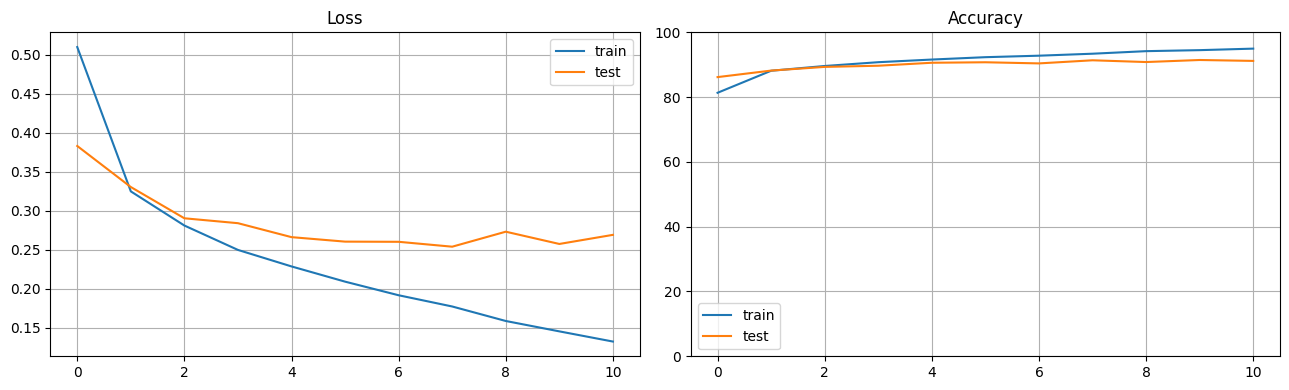

In [7]:
plot_history(history_model)

PART 2- Use VGG16 as base

In [44]:
img_size = 28 # dataset parameters (28, 28)

rgb_images_train = np.repeat(x_train, 3, axis=-1)
rgb_images_train_validate = np.repeat(y_train, 3, axis=-1)
rgb_images_validate = np.repeat(x_test, 3, axis=-1)
rgb_images_res_validate = np.repeat(y_test, 3, axis=-1)

conv_base = VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(32, 32, 3),
)

conv_base.trainable = False

model = k.models.Sequential([
    k.layers.Resizing(32, 32, interpolation="nearest", input_shape=(28, 28, 3)),
    conv_base,
    k.layers.Flatten(),
    k.layers.Dense(256, activation="relu"),
    k.layers.Dense(10, activation="softmax"),
])

model.compile(
    loss= k.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=k.optimizers.Adam(learning_rate=0.0002),
    metrics=['accuracy']
)

history_model =model.fit(
    rgb_images_train,
    y_train,
    epochs=15,
    batch_size=64,
    validation_data=(rgb_images_validate, y_test),
    verbose=1,
    callbacks=[
        k.callbacks.EarlyStopping(
            monitor="val_accuracy", patience=3, restore_best_weights=True
        ),
        k.callbacks.EarlyStopping(
            monitor="val_loss", patience=3, restore_best_weights=True
        ),
    ],
)

train_loss, train_acc = model.evaluate(x_train, y_train)

d:\project_GoIT\Python\Python\DS-HW-01\.conda\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15


d:\project_GoIT\Python\Python\DS-HW-01\.conda\Lib\site-packages\keras\src\backend\tensorflow\nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


938/938 ━━━━━━━━━━━━━━━━━━━━ 377s 400ms/step - accuracy: 0.6857 - loss: 1.0696 - val_accuracy: 0.8156 - val_loss: 0.5296
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 386s 411ms/step - accuracy: 0.8234 - loss: 0.5009 - val_accuracy: 0.8346 - val_loss: 0.4677
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 384s 409ms/step - accuracy: 0.8430 - loss: 0.4423 - val_accuracy: 0.8411 - val_loss: 0.4457
Epoch 4/15
535/938 ━━━━━━━━━━━━━━━━━━━━ 2:19 347ms/step - accuracy: 0.8539 - loss: 0.4110

KeyboardInterrupt: 